In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline

### Reading the standard Advertising dataset

In [2]:
# Read the file "Advertising_csv"
df = pd.read_csv('Advertising_adj.csv')

In [3]:
# Take a quick look at the data
df.head()

,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [4]:
# Define a bootstrap function, which inputs a dataframe & outputs a bootstrapped dataframe
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df


In [5]:
# Create two empty lists to store beta values
beta0_list, beta1_list = [],[]


# For each instance of the for loop, call your bootstrap function, calculate the beta values
# Store the beta values in the appropriate list

#Choose the number of "parallel" Universes to generate the new dataset
number_of_bootstraps = 1000

for i in range(number_of_bootstraps):
    df_new = bootstrap(df)

#Find the mean of the x values
    xmean = df_new.tv.mean()

#Find the mean of the y values
    ymean = df_new.sales.mean()

#'X' is the predictor variable given by df_new.tv values 
#'y' is the reponse variable given by df_new.sales values
    X = df_new.tv.values
    y = df_new.sales.values
    
# Using equations given and discussed in lecture compute the beta0 and beta1 values
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

# Append the calculated values of beta1 and beta0
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [6]:
### edTest(test_beta) ###

#Compute the mean of the beta0 and beta1 lists
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)

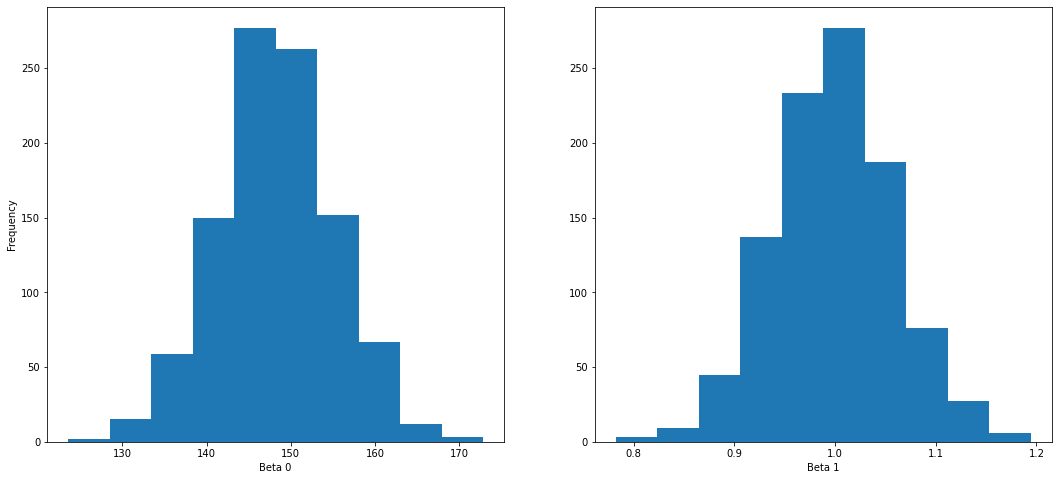

In [7]:
# plot histogram of beta0 and beta1
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list)
ax[1].hist(beta1_list)
ax[0].set_xlabel("Beta 0")
ax[1].set_xlabel("Beta 1")
ax[0].set_ylabel('Frequency');

### Compare the plots with the results from the RandomUniverse() function

In [8]:
# The below helper code will help you visualise the similarity between
# the bootstrap function you wrote & the RandomUniverse() function from last exercise
beta0_randUni, beta1_randUni = [],[]

parallelUniverses = 1000

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

# Using Linear Algebra result as discussed in lecture
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

    beta0_randUni.append(beta0)
    beta1_randUni.append(beta1)

In [9]:
# Use this helper code to plot the bootstrapped beta values & the ones from random universe
def plotmulti(list1, list2):
    fig, axes = plt.subplots(1,2, figsize = (10,4), sharey = 'row')
    axes[0].hist(list1);
    axes[0].set_xlabel('Beta Distribution')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Bootstrap')
    axes[1].hist(list2);
    axes[1].set_xlabel('Beta Distribution')
    axes[1].set_title('Random Universe')

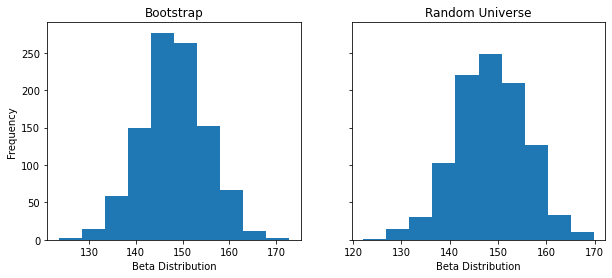

In [10]:
# Just use the 'plotmulti' function above to compare the two histograms for beta0
plotmulti(beta0_list, beta0_randUni)

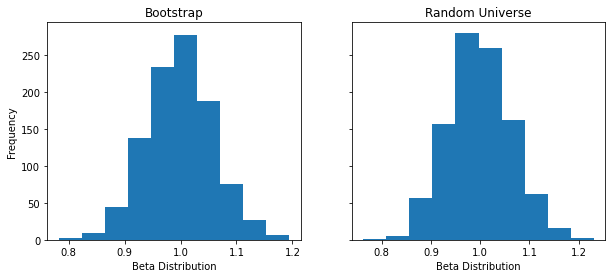

In [11]:
#Now compare for beta1
plotmulti(beta1_list, beta1_randUni)